In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

budget vs boxOffice
- ratings, as proxy for quality, have some effect
- biggest effect is budget, which has effects other than quality: promotion, star actors/directors
- critical mass cultural effect

genres


In [3]:
movies_df = pd.read_csv("moviesData.csv")
movies_df.rename(columns = {"Titles":"Title"}, inplace=True)
movies_df["IMDb"] *= 10  # scaling to match other ratings

# combine the two fan ratings columns into one composite fan rating column
movies_df["allFans"] = (movies_df["IMDb"] + movies_df["RTFan"])/2
# combine the two critic ratings columns into one composit critic rating column
movies_df["allCritics"] = (movies_df["RTCritic"] + movies_df["Metacritic"])/2

# import and merge additional movie data for movies in original dataset (movies_df)
movies_basic_metadata_df = pd.read_csv("movies_basic_metadata.csv")
bechdel_df = pd.read_csv("bechdel_basic.csv")
print("initial movies_df row count: {}".format(len(movies_df.columns)))
print("movies_basic_metadata row count: {}".format(len(movies_basic_metadata_df.columns)))
print("bechdel row count: {}".format(len(bechdel_df.columns)))

movies_df = movies_df.merge(movies_basic_metadata_df.drop_duplicates("title"), how="inner", left_on="Title", right_on="title")
movies_df = movies_df.merge(bechdel_df, how="inner", left_on="Title", right_on="title")
print("new (total) movies_df row count: {}".format(len(movies_df.columns)))


movies_df["allFans"] = (movies_df["IMDb"] + movies_df["RTFan"])/2
movies_df["allCritics"] = (movies_df["RTCritic"] + movies_df["Metacritic"])/2
movies_df["discrepancy"] = movies_df["allFans"] - movies_df["allCritics"]

# budget is stored as string for some reason - converting here
movies_df.budget = movies_df.budget.astype(int)
movies_df.head()


initial movies_df row count: 21
movies_basic_metadata row count: 11
bechdel row count: 4
new (total) movies_df row count: 36


,Title,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,...,runtime,status,tagline,vote_average,vote_count,title_y,bechdel,domgross,intgross,discrepancy
0,Treasure Planet,PG,69,70,71.0,60,38120554,2002,1,1,...,95.0,Released,Find your place in the universe.,7.2,980.0,Treasure Planet,FAIL,38120554.0,91800000.0,6.0
1,About Schmidt,R,85,74,72.0,85,65005217,2002,0,0,...,125.0,Released,Schmidt Happens,6.7,365.0,About Schmidt,FAIL,65005217.0,105823486.0,-12.0
2,Resident Evil,R,34,67,67.0,33,40119709,2002,1,0,...,100.0,Released,A secret experiment. A deadly virus. A fatal m...,6.4,2100.0,Resident Evil,PASS,40119709.0,103787401.0,33.5
3,Panic Room,R,76,63,68.0,65,95308367,2002,0,0,...,111.0,Released,NaN,6.6,1303.0,Panic Room,PASS,95308367.0,196308367.0,-5.0
4,Die Another Day,PG13,58,41,61.0,58,160942139,2002,1,0,...,133.0,Released,He’s never been cooler.,5.8,1112.0,Die Another Day,FAIL,160942139.0,431942139.0,-7.0


In [68]:
print("Mean of combined fan ratings: ".format(movies_df["allFans"].mean()))

Mean of combined fan ratings: 


''

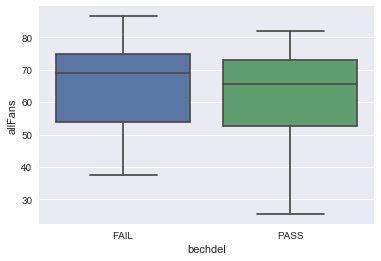

In [63]:
genre_ratings = []
genre_titles = list(movies_df)[10:19]
for genre_title in genre_titles:
    genre_ratings.extend( [
        genre_title,
        len(movies_df[movies_df[genre_title]==1]),
        movies_df[movies_df[genre_title]==1]["allFans"].mean(),
        movies_df[movies_df[genre_title]==1]["allCritics"].mean()
        ])
genre_df = pd.DataFrame(np.array(genre_ratings).reshape(9,4), columns = ["genre","count", "allFans", "allCritics"])
#sns.swarmplot(x="Rating", y="allFans", data = movies_df)
sns.boxplot(x="bechdel", y="allFans", data = movies_df)
;

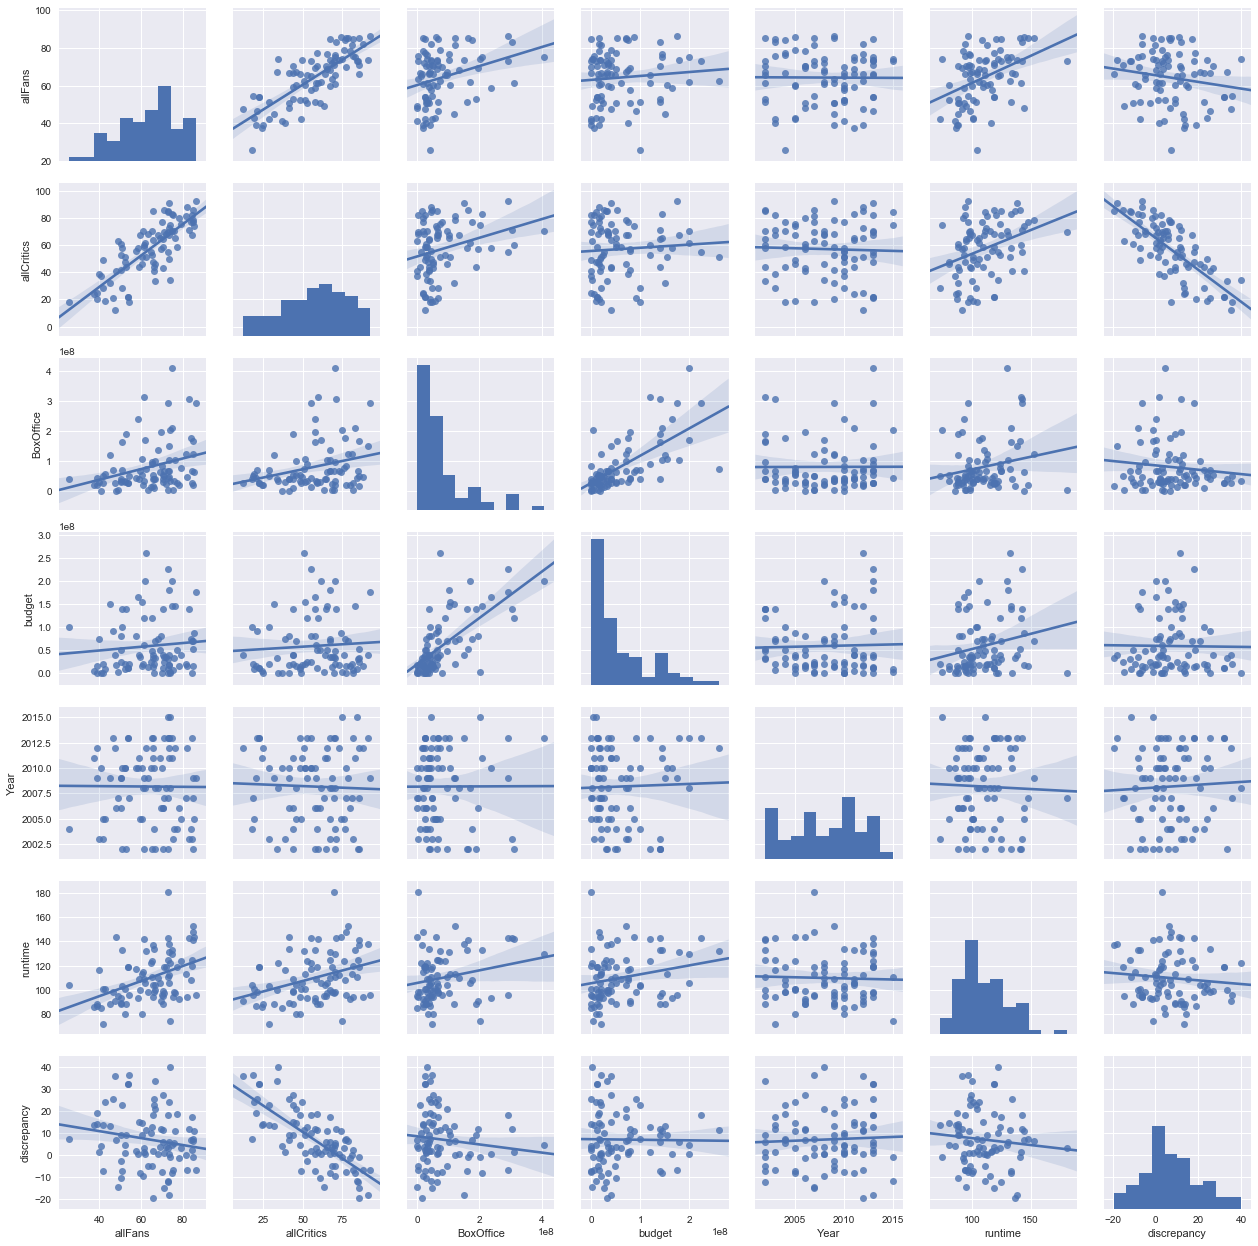

In [39]:
quantitatives = ["allFans", "allCritics", "BoxOffice", "budget", "Year", "runtime", "discrepancy"]
quantitative_df = pd.DataFrame()
for colTitle in quantitatives:
    quantitative_df[colTitle] = movies_df[colTitle]

quantitative_df.head()
sns.pairplot(quantitative_df, kind="reg");

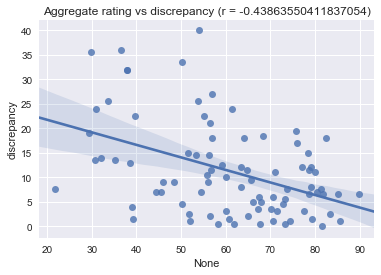

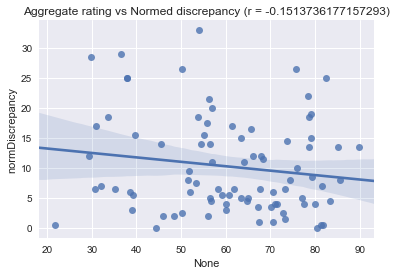

In [4]:
aggregate_rating = (movies_df["allFans"] + movies_df["allCritics"]) / 2
sns.regplot(aggregate_rating, abs(movies_df["discrepancy"]))
r = np.corrcoef(aggregate_rating, abs(movies_df["discrepancy"]))[0,1]
plt.title("Aggregate rating vs discrepancy (r = {})".format(r))
plt.show()


movies_df["normDiscrepancy"] = (movies_df["allFans"]-movies_df["allFans"].mean()) \
                                - (movies_df["allCritics"]-movies_df["allCritics"].mean())
sns.regplot(aggregate_rating, abs(movies_df["normDiscrepancy"]))
r = np.corrcoef(aggregate_rating, abs(movies_df["normDiscrepancy"]))[0,1]
plt.title("Aggregate rating vs Normed discrepancy (r = {})".format(r))
plt.show()

# Correlation of RT fans and RT critics:
r = np.corrcoef(movies_df["RTFan"], movies_df["RTCritic"])[0,1]
# Correlation of RT fans and Metacritic critics:
r = np.corrcoef(movies_df["RTFan"], movies_df["Metacritic"])[0,1]
# Correlation of IMDb fans and Metacritic critics:
r = np.corrcoef(movies_df["IMDb"], movies_df["RTCritic"])[0,1]
# Correlation of IMDb fans and RT critics:
r = np.corrcoef(movies_df["IMDb"], movies_df["Metacritic"])[0,1]
# Correlation of IMDb fans and RT critics:
r = np.corrcoef(movies_df["IMDb"], movies_df["RTFan"])[0,1]
# Correlation of IMDb fans and RT critics:
r = np.corrcoef(movies_df["RTCritic"], movies_df["Metacritic"])[0,1]

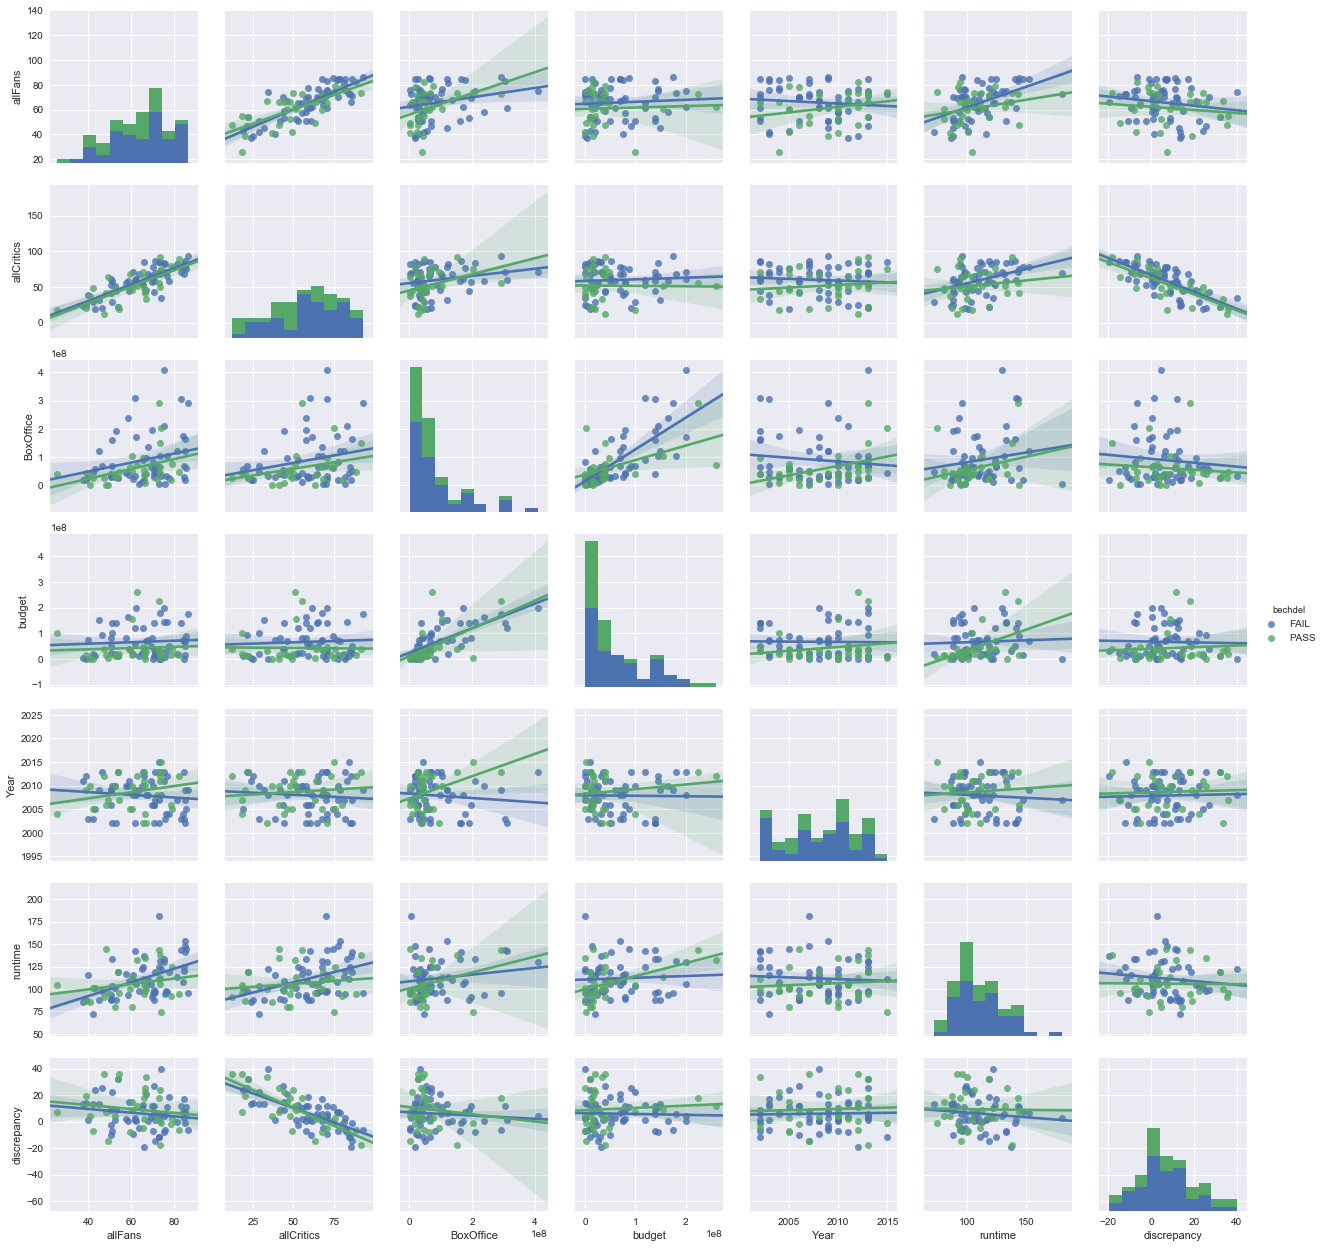

In [52]:
quantitative_df["bechdel"] = movies_df["bechdel"]
sns.pairplot(quantitative_df, hue="bechdel", kind="reg");

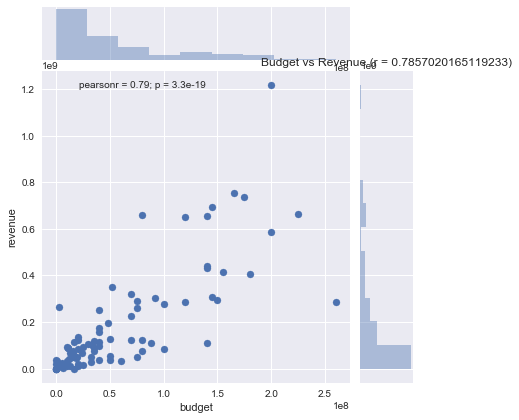

In [29]:
x = movies_df["budget"]
y = movies_df["revenue"]
sns.jointplot(x,y)
r = np.corrcoef(x,y)[0,1]
plt.title("Budget vs Revenue (r = {})".format(r))
plt.show()


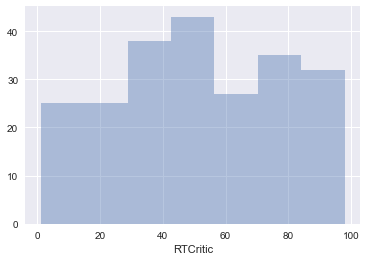

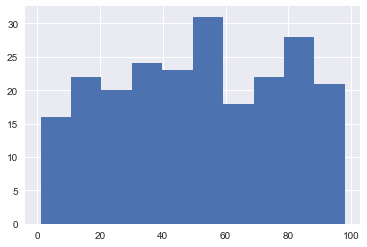

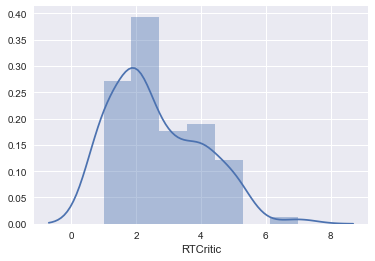

In [22]:
sns.distplot(movies_df["RTCritic"], kde=False)
plt.show()

plt.hist(movies_df["RTCritic"])
plt.show()

sns.distplot(movies_df.RTCritic.value_counts())
plt.show()